### 00: Import standard libraries needed for DS & DL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

2023-03-29 19:45:08.717396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-29 19:45:08.717424: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%load_ext tensorboard

### 01: Load beijing dataset

In [3]:
train = pd.read_csv('02_train.csv', sep=';')
test = pd.read_csv('02_test.csv', sep=';')
x_train = train.drop(['totalPrice'], axis=1)
y_train = train['totalPrice']
x_test = test.drop(['totalPrice'], axis=1)
y_test = test['totalPrice']
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [4]:
x_train.shape

(219943, 26)

In [5]:
y_train.shape

(219943,)

### 02: Define input layer (26x1) as a tensor

Since we are constructing an ANN (Artifical neural network - Feed-forward neural network) we need to transform the input into a 1-Dimensional Tensor. Data need to be normalised and here a normal Normalization process will be take place.

In [6]:
input_layer = tf.keras.Input(shape=(26, 1), name="input")
flatten_layer = tf.keras.layers.Flatten(name="flatten")
norm_layer = tf.keras.layers.Normalization()

2023-03-29 19:45:10.399249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-29 19:45:10.399283: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-29 19:45:10.399303: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (glatzl): /proc/driver/nvidia/version does not exist
2023-03-29 19:45:10.399504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 03: Define the output layer (1) as a vector.

Using a dense layer because every neuron on the output layer needs to be connected to all neurons of the previous layer (For now on feed-forward neural networks). The output layer only needs one neuron since we have a regression problem (continuos value). Normally, in a regression problem, a linear activation function should be used. 

In [7]:
output_layer = tf.keras.layers.Dense(1, activation="linear", name="output")

### 04: Define the hidden layers. 

As the same as the MNIST dataset, since i don't know the real-world properties about the data, i simply will use for now a hidden layer with the same amount of features for amount of hidden nodes.

In [8]:
hidden_layer = tf.keras.layers.Dense(26, activation="relu", name="hidden")

### 05: Define loss function

Since this problem is a regression one, the loss function should be something like an mean squared error. For this exercise, i will use mean squared error loss and stochastic gradient descent as the optimizer

In [9]:
loss_function = tf.keras.losses.MeanSquaredError()

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, clipnorm=1.0)

### 06: Define Dropout

Dropout is a regularisation technique and it can be defined on the input layer or hidden layers. In this project, i will use a Dropout layer after the hidden layer with a dropout rate of 20%

In [11]:
dropout_layer = tf.keras.layers.Dropout(0.2)

### 07: Define Bias regularisation technique (L1, L2 or Elastic)

Since this neural network only has one hidden layer, it is obvious where the regularisation will be taken. L1 will be used (Lasso)

In [12]:
hidden_layer.kernel_regularizer = tf.keras.regularizers.l1()

### 08: Build & train base model (Multilayer perceptron - MLP)

In [13]:
model = tf.keras.models.Sequential(name="beijing_model")
model.add(input_layer)
model.add(flatten_layer)
model.add(norm_layer)
model.add(hidden_layer)
model.add(dropout_layer)
model.add(output_layer)

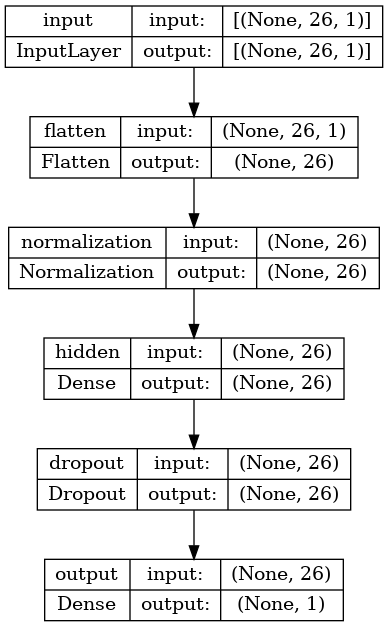

In [14]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [15]:
model.compile(loss=loss_function, optimizer=optimizer, metrics=['mse'])

In [16]:
base_history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
5499/5499 [==============================] - 9s 1ms/step - loss: 161799.5938 - mse: 161798.5469 - val_loss: 153082.5625 - val_mse: 153081.0938
Epoch 2/10
5499/5499 [==============================] - 8s 1ms/step - loss: 108966.5703 - mse: 108965.0469 - val_loss: 83972.7109 - val_mse: 83971.0078
Epoch 3/10
5499/5499 [==============================] - 8s 1ms/step - loss: 45815.9375 - mse: 45814.1172 - val_loss: 29326.7793 - val_mse: 29324.7773
Epoch 4/10
5499/5499 [==============================] - 8s 2ms/step - loss: 20378.4863 - mse: 20376.5195 - val_loss: 22212.4004 - val_mse: 22210.4004
Epoch 5/10
5499/5499 [==============================] - 8s 1ms/step - loss: 17733.6387 - mse: 17731.6270 - val_loss: 20496.6191 - val_mse: 20494.6094
Epoch 6/10
5499/5499 [==============================] - 8s 1ms/step - loss: 16252.7783 - mse: 16250.7490 - val_loss: 19327.8340 - val_mse: 19325.8066
Epoch 7/10
5499/5499 [==============================] - 8s 1ms/step - loss: 15383.3662 - mse: 

In [17]:
base_history.history

{'loss': [161799.59375,
  108966.5703125,
  45815.9375,
  20378.486328125,
  17733.638671875,
  16252.7783203125,
  15383.3662109375,
  14575.0732421875,
  13999.7509765625,
  13396.64453125],
 'mse': [161798.546875,
  108965.046875,
  45814.1171875,
  20376.51953125,
  17731.626953125,
  16250.7490234375,
  15381.376953125,
  14573.0419921875,
  13997.6923828125,
  13394.57421875],
 'val_loss': [153082.5625,
  83972.7109375,
  29326.779296875,
  22212.400390625,
  20496.619140625,
  19327.833984375,
  18490.34765625,
  17630.390625,
  17011.107421875,
  16399.455078125],
 'val_mse': [153081.09375,
  83971.0078125,
  29324.77734375,
  22210.400390625,
  20494.609375,
  19325.806640625,
  18488.29296875,
  17628.32421875,
  17009.005859375,
  16397.349609375]}

### 09: Plot the results of the base model

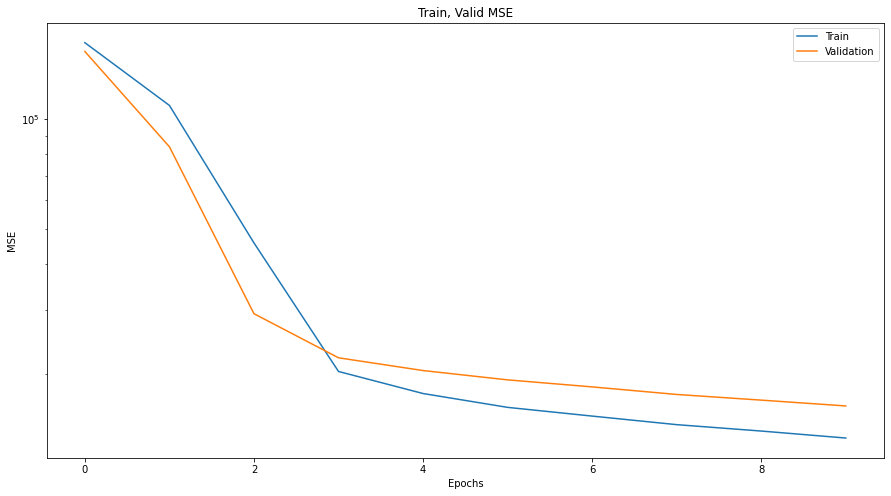

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(base_history.history["loss"], label='Train')
plt.plot(base_history.history["val_loss"], label='Validation')
plt.title("Train, Valid MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.yscale('log')
plt.legend()
plt.show()

In [19]:
base_history.history

{'loss': [161799.59375,
  108966.5703125,
  45815.9375,
  20378.486328125,
  17733.638671875,
  16252.7783203125,
  15383.3662109375,
  14575.0732421875,
  13999.7509765625,
  13396.64453125],
 'mse': [161798.546875,
  108965.046875,
  45814.1171875,
  20376.51953125,
  17731.626953125,
  16250.7490234375,
  15381.376953125,
  14573.0419921875,
  13997.6923828125,
  13394.57421875],
 'val_loss': [153082.5625,
  83972.7109375,
  29326.779296875,
  22212.400390625,
  20496.619140625,
  19327.833984375,
  18490.34765625,
  17630.390625,
  17011.107421875,
  16399.455078125],
 'val_mse': [153081.09375,
  83971.0078125,
  29324.77734375,
  22210.400390625,
  20494.609375,
  19325.806640625,
  18488.29296875,
  17628.32421875,
  17009.005859375,
  16397.349609375]}

In [20]:
base_score = model.evaluate(x_test, y_test)

2946/2946 [==============================] - 3s 879us/step - loss: 10237.9121 - mse: 10235.8086


In [21]:
base_score

[10237.912109375, 10235.80859375]

In [22]:
base_model = model

### 10: Hyperparameter tuning for optimized model

There are a lot of ways on how to do this, in this exercise i will use the hyperband approach (A Novel Banid-Based Approach to Hyperparameter Optimization). https://arxiv.org/pdf/1603.06560.pdf
Basically it trains a few models on few rounds and it will only take the best models to the next round. See it like as a sport championship.

In [23]:
def model_builder(hp):
    hp_reg = hp.Choice('regularizer', values=['l1', 'l2', 'l1_l2', 'None'])
    if hp_reg == 'l1':
        reg = tf.keras.regularizers.l1()
    elif hp_reg == 'l2':
        reg = tf.keras.regularizers.l2()
    elif hp_reg == 'l1_l2':
        reg = tf.keras.regularizers.l1_l2()
    else:
        reg = None

    hp_opt = hp.Choice('optimizer', values=['adadelta', 'adam', 'sgd'])
    if hp_opt == 'adadelta':
        opt = tf.keras.optimizers.Adadelta(learning_rate=0.001, clipnorm=1.0)
    elif hp_opt == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=0.001, clipnorm=1.0)

    norm_layer = tf.keras.layers.Normalization()
    norm_layer.adapt(x_train)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(26, 1)))
    model.add(norm_layer)
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=26, max_value=26*4, step=26), 
        activation=hp.Choice('activation', values=['relu', 'sigmoid']),
        kernel_regularizer=reg
    ))
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.6, step=0.2)))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=opt,
        loss=keras.losses.MeanSquaredError(),
        metrics=['mse']
    )
    return model

tuner = kt.Hyperband(model_builder, objective='mse', max_epochs=10, factor=3, project_name='optimized_model')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=10)[0]

INFO:tensorflow:Reloading Tuner from ./optimized_model/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [24]:
best_hyperparameters.values

{'regularizer': 'l1_l2',
 'optimizer': 'adam',
 'units': 26,
 'activation': 'relu',
 'dropout': 0.2,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}

### 11: Training optimized model

In [25]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [26]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
optimized_model = tuner.hypermodel.build(best_hyperparameters)
optimized_history = optimized_model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[tensorboard_callback])

val_loss_per_epoch = optimized_history.history['val_loss']
best_epoch = val_loss_per_epoch.index(max(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
5499/5499 [==============================] - 10s 2ms/step - loss: 53673.6641 - mse: 53660.6641 - val_loss: 16055.8115 - val_mse: 16038.3525
Epoch 2/10
5499/5499 [==============================] - 10s 2ms/step - loss: 12110.5654 - mse: 12092.6650 - val_loss: 13301.0361 - val_mse: 13282.6602
Epoch 3/10
5499/5499 [==============================] - 9s 2ms/step - loss: 11130.2402 - mse: 11111.5322 - val_loss: 12299.9170 - val_mse: 12280.8232
Epoch 4/10
5499/5499 [==============================] - 10s 2ms/step - loss: 10469.2295 - mse: 10449.6836 - val_loss: 11703.9365 - val_mse: 11684.0381
Epoch 5/10
5499/5499 [==============================] - 10s 2ms/step - loss: 9782.5508 - mse: 9762.1807 - val_loss: 11364.8379 - val_mse: 11344.0410
Epoch 6/10
5499/5499 [==============================] - 9s 2ms/step - loss: 9296.0264 - mse: 9274.8516 - val_loss: 11127.3115 - val_mse: 11105.7275
Epoch 7/10
5499/5499 [==============================] - 9s 2ms/step - loss: 9088.9570 - mse: 9066.97

In [27]:
optimized_history

### 12: Comparing base and optimized model

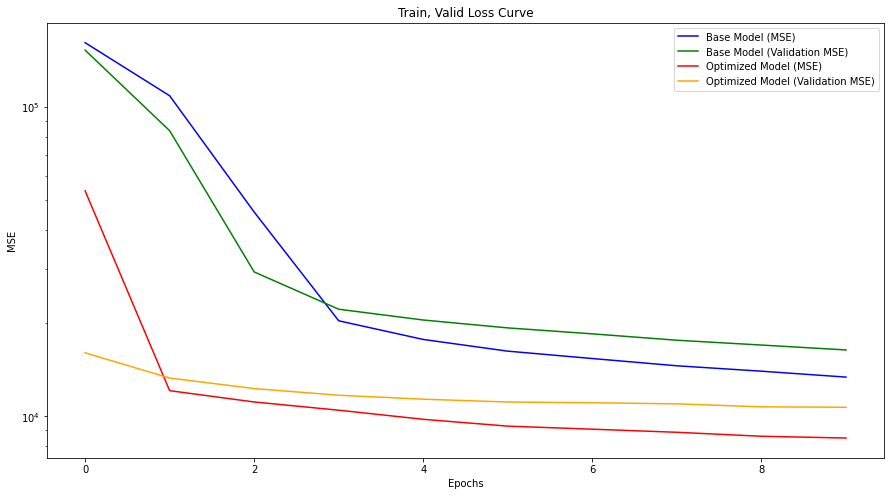

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(base_history.history['loss'], label="Base Model (MSE)", color="blue")
plt.plot(base_history.history['val_loss'], label="Base Model (Validation MSE)", color="green")
plt.plot(optimized_history.history['loss'], label="Optimized Model (MSE)", color="red")
plt.plot(optimized_history.history['val_loss'], label="Optimized Model (Validation MSE)", color="orange")
plt.title("Train, Valid Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.yscale('log')
plt.legend()
plt.show()

In [29]:
print("Test Score:")
print(f"Base Model: {base_model.evaluate(x_test, y_test)}")
print(f"Optimized Model: {optimized_model.evaluate(x_test, y_test)}")

Test Score:
2946/2946 [==============================] - 3s 887us/step - loss: 10237.9121 - mse: 10235.8086
Base Model: [10237.912109375, 10235.80859375]
2946/2946 [==============================] - 3s 906us/step - loss: 5766.8555 - mse: 5742.0430
Optimized Model: [5766.85546875, 5742.04296875]


### 14: Optimized Model wins with MSE of 5766 and base has 10237

In [30]:
# Base predict
base_model.predict(x_test)

2946/2946 [==============================] - 2s 731us/step


array([[236.17204],
       [152.19936],
       [468.38443],
       ...,
       [265.04663],
       [180.80632],
       [147.68092]], dtype=float32)

In [31]:
# Optimized predict
optimized_model.predict(x_test)

2946/2946 [==============================] - 2s 746us/step


array([[257.74164],
       [188.29472],
       [403.79895],
       ...,
       [294.56018],
       [167.4323 ],
       [149.22986]], dtype=float32)